In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


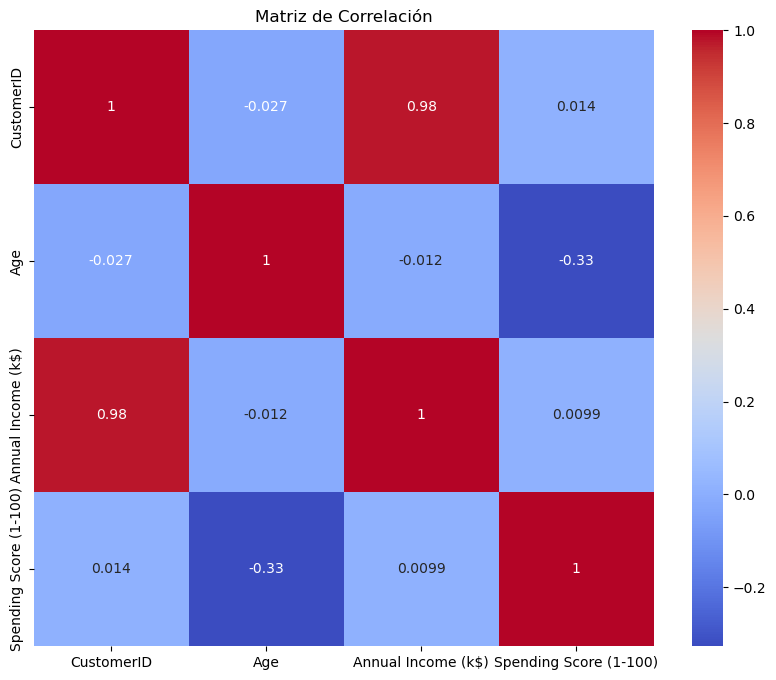

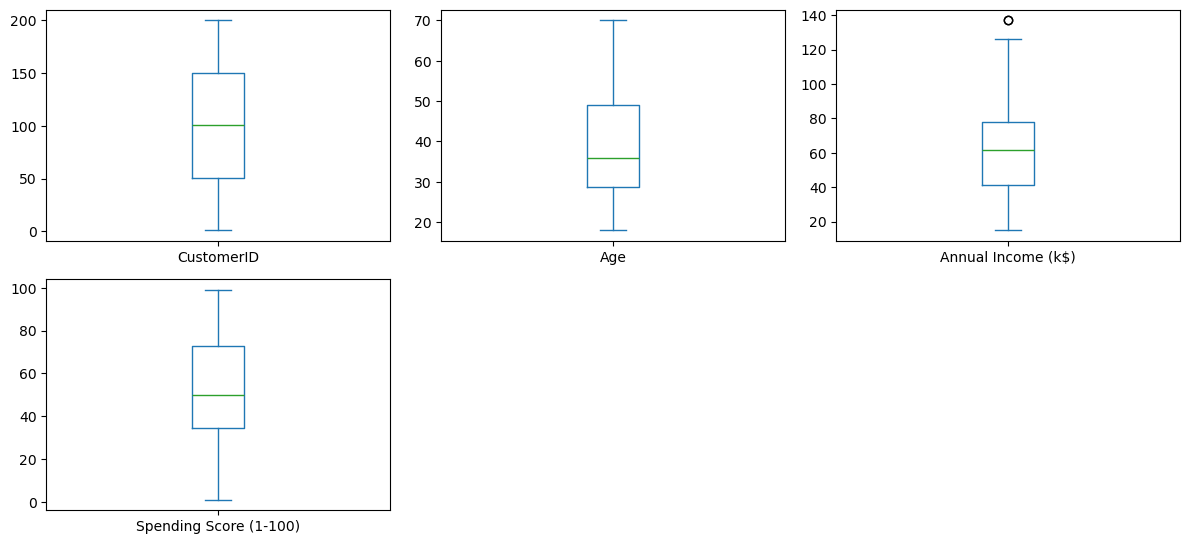

In [2]:
# Información básica
df.info()

# Ver estadísticos
df.describe()

# Ver correlación entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Detección de outliers
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [3]:
# Eliminar filas con valores faltantes
df_clean = df.dropna()

# Seleccionar columnas numéricas para clustering
df_features = df_clean.select_dtypes(include=[np.number])

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

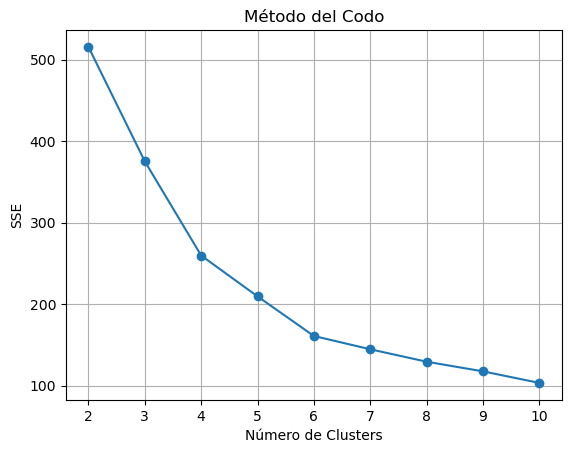

In [4]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.grid()
plt.show()


In [11]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

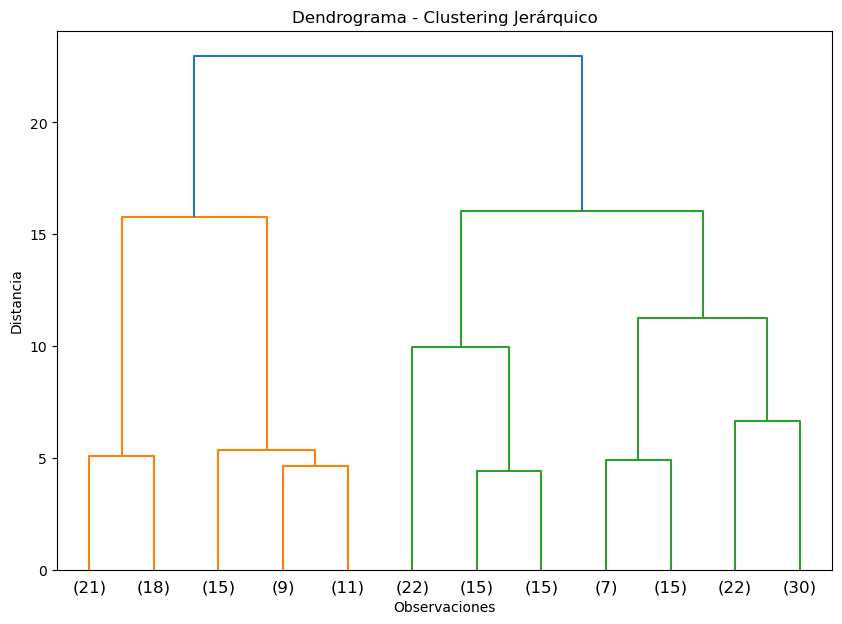

In [15]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()

hc = AgglomerativeClustering(n_clusters=3)
labels_hc = hc.fit_predict(X_scaled)

In [19]:
print("K-means:")
print("Silhouette:", silhouette_score(X_scaled, labels_kmeans))
print("Calinski-Harabasz:", calinski_harabasz_score(X_scaled, labels_kmeans))

print("\nClustering Jerárquico:")
print("Silhouette:", silhouette_score(X_scaled, labels_hc))
print("Calinski-Harabasz:", calinski_harabasz_score(X_scaled, labels_hc))

K-means:
Silhouette: 0.33627250175154105
Calinski-Harabasz: 111.48622496693123

Clustering Jerárquico:
Silhouette: 0.30874740679157575
Calinski-Harabasz: 94.85428751941517


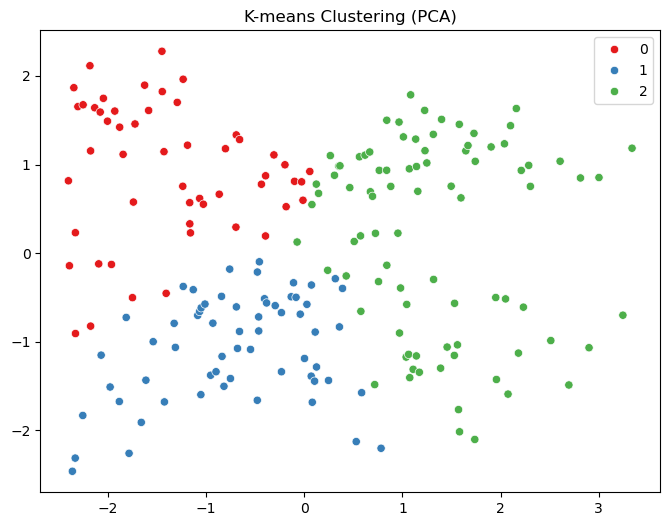

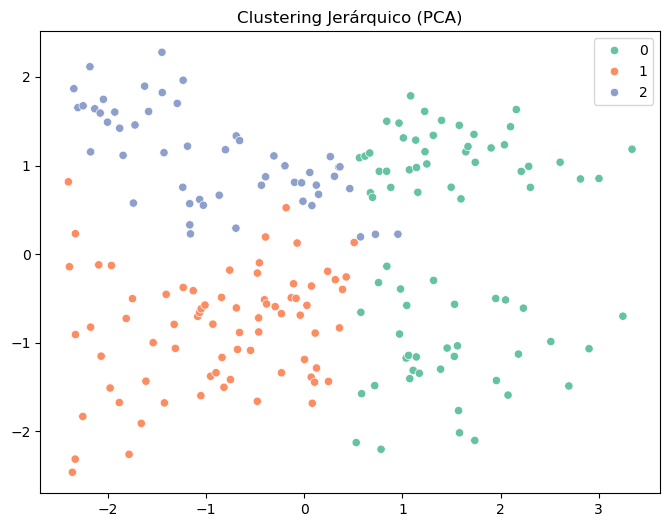

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='Set1')
plt.title('K-means Clustering (PCA)')
plt.show()

# Jerárquico
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_hc, palette='Set2')
plt.title('Clustering Jerárquico (PCA)')
plt.show()